In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import scipy.stats as stats
from basketball_reference_scraper.players import get_stats, get_game_logs, get_player_headshot

from matplotlib import rcParams




In [113]:
# Constants
SEASON_2017_START = '2016-10-25'
SEASON_2017_END = '2017-04-14'
SEASON_2018_START = '2017-10-17'
SEASON_2018_END = '2018-04-14'
SEASON_2019_START = '2018-10-18'
SEASON_2019_END = '2019-04-12'
SEASON_2020_START = '2019-10-22'
SEASON_2020_END = '2020-08-15'
SEASON_2021_START = '2020-12-22'
SEASON_2021_END = '2021-05-16'

## Player Functions

In [114]:
# glossary:
"""GmSc - Game Score; the formula is PTS + 0.4 * FG - 0.7 * FGA - 0.4*(FTA - FT) + 0.7 * ORB + 0.3 * DRB + STL + 0.7 * AST + 0.7 * BLK - 0.4 * PF - TOV
"""


'GmSc - Game Score; the formula is PTS + 0.4 * FG - 0.7 * FGA - 0.4*(FTA - FT) + 0.7 * ORB + 0.3 * DRB + STL + 0.7 * AST + 0.7 * BLK - 0.4 * PF - TOV\n'

In [115]:
# get game logs for tatum
tatum_2018 = get_game_logs('Jayson Tatum', SEASON_2018_START, SEASON_2018_END, playoffs=False)
tatum_2019 = get_game_logs('Jayson Tatum', SEASON_2019_START, SEASON_2019_END, playoffs=False)
tatum_2020 = get_game_logs('Jayson Tatum', SEASON_2020_START, SEASON_2020_END, playoffs=False)
tatum_2021 = get_game_logs('Jayson Tatum', SEASON_2021_START, SEASON_2021_END, playoffs=False)

You searched for "Jayson Tatum"
1 result found.
Jayson Tatum
Results for Jayson Tatum:

You searched for "Jayson Tatum"
1 result found.
Jayson Tatum
Results for Jayson Tatum:

You searched for "Jayson Tatum"
1 result found.
Jayson Tatum
Results for Jayson Tatum:

You searched for "Jayson Tatum"
1 result found.
Jayson Tatum
Results for Jayson Tatum:



In [116]:
tatum_2018['GAME_SCORE'] = tatum_2018['GAME_SCORE'].astype(float)
tatum_2019['GAME_SCORE'] = tatum_2019['GAME_SCORE'].astype(float)
tatum_2020['GAME_SCORE'] = tatum_2020['GAME_SCORE'].astype(float)
tatum_2021['GAME_SCORE'] = tatum_2021['GAME_SCORE'].astype(float)

In [117]:
# now get for Luka

In [118]:
luka_2018 = get_game_logs('Luka Doncic', SEASON_2018_START, SEASON_2018_END, playoffs=False)
luka_2019 = get_game_logs('Luka Doncic', SEASON_2019_START, SEASON_2019_END, playoffs=False)
luka_2020 = get_game_logs('Luka Doncic', SEASON_2020_START, SEASON_2020_END, playoffs=False)
luka_2021 = get_game_logs('Luka Doncic', SEASON_2021_START, SEASON_2021_END, playoffs=False)

You searched for "Luka Doncic"
1 result found.
Luka Doncic
Results for Luka Doncic:

You searched for "Luka Doncic"
1 result found.
Luka Doncic
Results for Luka Doncic:

You searched for "Luka Doncic"
1 result found.
Luka Doncic
Results for Luka Doncic:

You searched for "Luka Doncic"
1 result found.
Luka Doncic
Results for Luka Doncic:



In [119]:
luka_2018['GAME_SCORE'] = luka_2018['GAME_SCORE'].astype(float)
luka_2019['GAME_SCORE'] = luka_2019['GAME_SCORE'].astype(float)
luka_2020['GAME_SCORE'] = luka_2020['GAME_SCORE'].astype(float)
luka_2021['GAME_SCORE'] = luka_2021['GAME_SCORE'].astype(float)

In [120]:
luka_2021.head()

,DATE,AGE,TEAM,HOME/AWAY,OPPONENT,RESULT,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GAME_SCORE,+/-
0,2020-12-23,21-299,DAL,AWAY,PHO,L (-4),1,35:57,11,26,...,6,8,5,0,0,1,2,32,22.3,-9
1,2020-12-25,21-301,DAL,AWAY,LAL,L (-23),1,34:08,9,19,...,4,4,7,0,1,3,0,27,20.7,-14
2,2020-12-27,21-303,DAL,AWAY,LAC,W (+51),1,25:55,8,18,...,9,9,8,1,0,2,0,24,21.5,+29
3,2020-12-30,21-306,DAL,HOME,CHO,L (-19),1,24:04,4,10,...,2,2,5,2,0,3,3,12,7.3,-27
4,2021-01-01,21-308,DAL,HOME,MIA,W (+10),1,35:49,9,22,...,14,15,7,0,1,5,2,27,18.7,+12


In [129]:
luka_career = pd.concat([luka_2018, luka_2019, luka_2020, luka_2021], axis=0)

In [131]:
luka_career_sorted = luka_career.sort_values(by='GAME_SCORE', ascending=False)
luka_career_sorted.head(12)

,DATE,AGE,TEAM,HOME/AWAY,OPPONENT,RESULT,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GAME_SCORE,+/-
74,2020-08-08,21-162,DAL,HOME,MIL,W (+4),1,41:34,12,24,...,13,14,19,1,0,2,1,36,40.1,+12
27,2021-02-12,21-350,DAL,HOME,NOP,W (+13),1,40:01,17,30,...,7,8,12,1,1,3,4,46,39.3,+13
17,2019-11-29,20-274,DAL,AWAY,PHO,W (+7),1,37:33,12,24,...,7,9,11,1,0,2,4,42,37.4,+3
28,2021-02-14,21-352,DAL,HOME,POR,L (-3),1,36:21,14,20,...,6,7,9,0,0,5,4,44,37.4,-10
16,2021-01-25,21-332,DAL,HOME,DEN,L (-4),1,39:03,11,23,...,9,11,16,4,1,5,3,35,37.1,+8
31,2019-12-28,20-303,DAL,AWAY,GSW,W (+20),1,30:05,8,16,...,10,12,15,2,0,3,0,31,36.9,+20
39,2021-03-17,22-017,DAL,HOME,LAC,W (+16),1,42:48,16,28,...,5,6,9,3,2,4,2,42,36.5,+29
24,2019-12-12,20-287,DAL,AWAY,DET,W (+11),1,33:39,14,24,...,11,12,11,0,0,3,2,41,35.7,+29
13,2019-11-20,20-265,DAL,HOME,GSW,W (+48),1,25:30,11,18,...,9,10,11,4,0,5,3,35,35.3,+45
7,2021-01-07,21-314,DAL,AWAY,DEN,W (+7),1,43:17,13,22,...,9,9,13,5,1,8,0,38,35.3,+14


In [134]:
luka_best_game_2018 = luka_2018[luka_2018['GAME_SCORE'] > 30]
luka_best_game_2019 = luka_2019[luka_2019['GAME_SCORE'] > 30]
luka_best_game_2020 = luka_2020[luka_2020['GAME_SCORE'] > 30]
luka_best_game_2021 = luka_2021[luka_2021['GAME_SCORE'] > 30]
luka_best_game_2020
#luka_best_game_2021

,DATE,AGE,TEAM,HOME/AWAY,OPPONENT,RESULT,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GAME_SCORE,+/-
5,2019-11-03,20-248,DAL,AWAY,CLE,W (+20),1,33:33,9,17,...,10,14,15,0,0,5,2,29,31.2,+15
10,2019-11-14,20-259,DAL,AWAY,NYK,L (-3),1,35:32,10,23,...,9,10,11,3,1,3,1,33,31.1,-3
12,2019-11-18,20-263,DAL,HOME,SAS,W (+7),1,35:15,14,27,...,9,11,12,0,0,5,5,42,32.6,+11
13,2019-11-20,20-265,DAL,HOME,GSW,W (+48),1,25:30,11,18,...,9,10,11,4,0,5,3,35,35.3,+45
14,2019-11-22,20-267,DAL,HOME,CLE,W (+42),1,28:29,11,18,...,7,7,14,0,0,2,2,30,30.9,+21
15,2019-11-24,20-269,DAL,AWAY,HOU,W (+14),1,34:26,15,30,...,6,6,10,2,1,5,3,41,30.5,+21
17,2019-11-29,20-274,DAL,AWAY,PHO,W (+7),1,37:33,12,24,...,7,9,11,1,0,2,4,42,37.4,+3
24,2019-12-12,20-287,DAL,AWAY,DET,W (+11),1,33:39,14,24,...,11,12,11,0,0,3,2,41,35.7,+29
31,2019-12-28,20-303,DAL,AWAY,GSW,W (+20),1,30:05,8,16,...,10,12,15,2,0,3,0,31,36.9,+20
36,2020-01-06,20-312,DAL,HOME,CHI,W (+8),1,34:22,14,24,...,10,11,10,0,1,3,2,38,32.8,+8


# Concat and create career dataframe

In [121]:
#tatum['GAME_SCORE'].max()
#tatum['GAME_SCORE'].min()
tatum_2018
tatum_2019
tatum_career = pd.concat([tatum_2018, tatum_2019, tatum_2020, tatum_2021], axis=0)



## Best Game analysis by ordering by game-score over career

In [122]:
tatum_career_sorted = tatum_career.sort_values(by='GAME_SCORE', ascending=False)
tatum_career_sorted.head(12)

,DATE,AGE,TEAM,HOME/AWAY,OPPONENT,RESULT,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GAME_SCORE,+/-
66,2021-04-30,23-058,BOS,HOME,SAS,W (+3),1,45:20,20,37,...,6,8,5,0,1,0,2,60,47.9,+6
54,2021-04-09,23-037,BOS,HOME,MIN,W (+9),1,41:00,16,25,...,9,10,4,0,1,5,3,53,42.2,+5
37,2020-01-11,21-314,BOS,HOME,NOP,W (+35),1,30:23,16,22,...,6,6,4,3,0,0,1,41,39.2,+30
58,2021-04-17,23-045,BOS,HOME,GSW,W (+5),1,39:50,16,25,...,10,10,3,2,0,2,2,44,36.8,+12
57,2020-02-23,21-357,BOS,AWAY,LAL,L (-2),1,36:33,12,20,...,4,5,2,1,2,2,3,41,33.5,+6
7,2021-01-04,22-307,BOS,AWAY,TOR,W (+12),1,31:41,11,19,...,6,6,2,0,2,1,5,40,32.7,+24
46,2021-03-26,23-023,BOS,AWAY,MIL,W (+8),1,32:38,13,18,...,6,6,7,1,1,2,3,34,31.8,+9
27,2019-12-22,21-294,BOS,HOME,CHO,W (+26),1,35:51,15,29,...,11,12,2,1,3,2,1,39,30.8,+10
44,2019-01-14,20-317,BOS,AWAY,BRK,L (-7),1,35:37,12,19,...,5,5,3,1,3,0,3,34,29.4,-13
68,2020-08-02,22-152,BOS,HOME,POR,W (+4),1,39:33,11,22,...,4,4,8,2,1,2,1,34,29.3,+6


In [132]:
tatum_best_game_2018 = tatum_2018[tatum_2018['GAME_SCORE'] > 30]
tatum_best_game_2019 = tatum_2019[tatum_2019['GAME_SCORE'] > 30]
tatum_best_game_2020 = tatum_2020[tatum_2020['GAME_SCORE'] > 30]
tatum_best_game_2021 = tatum_2021[tatum_2021['GAME_SCORE'] > 30]
tatum_best_game_2020
tatum_best_game_2021

,DATE,AGE,TEAM,HOME/AWAY,OPPONENT,RESULT,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GAME_SCORE,+/-
7,2021-01-04,22-307,BOS,AWAY,TOR,W (+12),1,31:41,11,19,...,6,6,2,0,2,1,5,40,32.7,+24
46,2021-03-26,23-023,BOS,AWAY,MIL,W (+8),1,32:38,13,18,...,6,6,7,1,1,2,3,34,31.8,+9
54,2021-04-09,23-037,BOS,HOME,MIN,W (+9),1,41:00,16,25,...,9,10,4,0,1,5,3,53,42.2,+5
58,2021-04-17,23-045,BOS,HOME,GSW,W (+5),1,39:50,16,25,...,10,10,3,2,0,2,2,44,36.8,+12
66,2021-04-30,23-058,BOS,HOME,SAS,W (+3),1,45:20,20,37,...,6,8,5,0,1,0,2,60,47.9,+6


In [124]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,15))
plt.plot(tatum['DATE'], tatum['GAME_SCORE'])
plt.yticks(fontsize=12)
plt.show()

NameError: name 'tatum' is not defined

<Figure size 1440x1080 with 0 Axes>

Text(0.5, 1.0, '2021 Season')

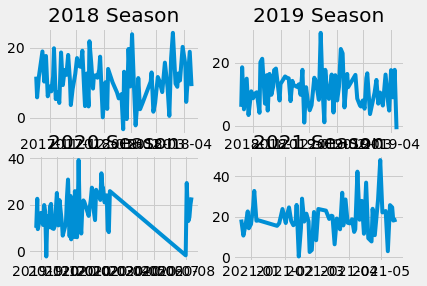

In [125]:
# subplots

# plot 1
plt.subplot(2, 2, 1)
plt.plot(tatum_2018['DATE'], tatum_2018['GAME_SCORE'])
plt.title("2018 Season")

# plot 2
plt.subplot(2, 2, 2)
plt.plot(tatum_2019['DATE'], tatum_2019['GAME_SCORE'])
plt.title("2019 Season")

# plot 3
plt.subplot(2, 2, 3)
plt.plot(tatum_2020['DATE'], tatum_2020['GAME_SCORE'])
plt.title("2020 Season")


# plot 4
plt.subplot(2, 2, 4)
plt.plot(tatum_2021['DATE'], tatum_2021['GAME_SCORE'])
plt.title("2021 Season")

In [126]:
#x_2018 = tatum_2018['DATE']
#y_2018 = tatum_2018['GAME_SCORE']
# To perform the linear regression we need the dates to be numeric
#tatum_2018['DATE_ordinal'] = pd.to_datetime(tatum_2018['DATE']).apply(lambda DATE: DATE.toordinal())

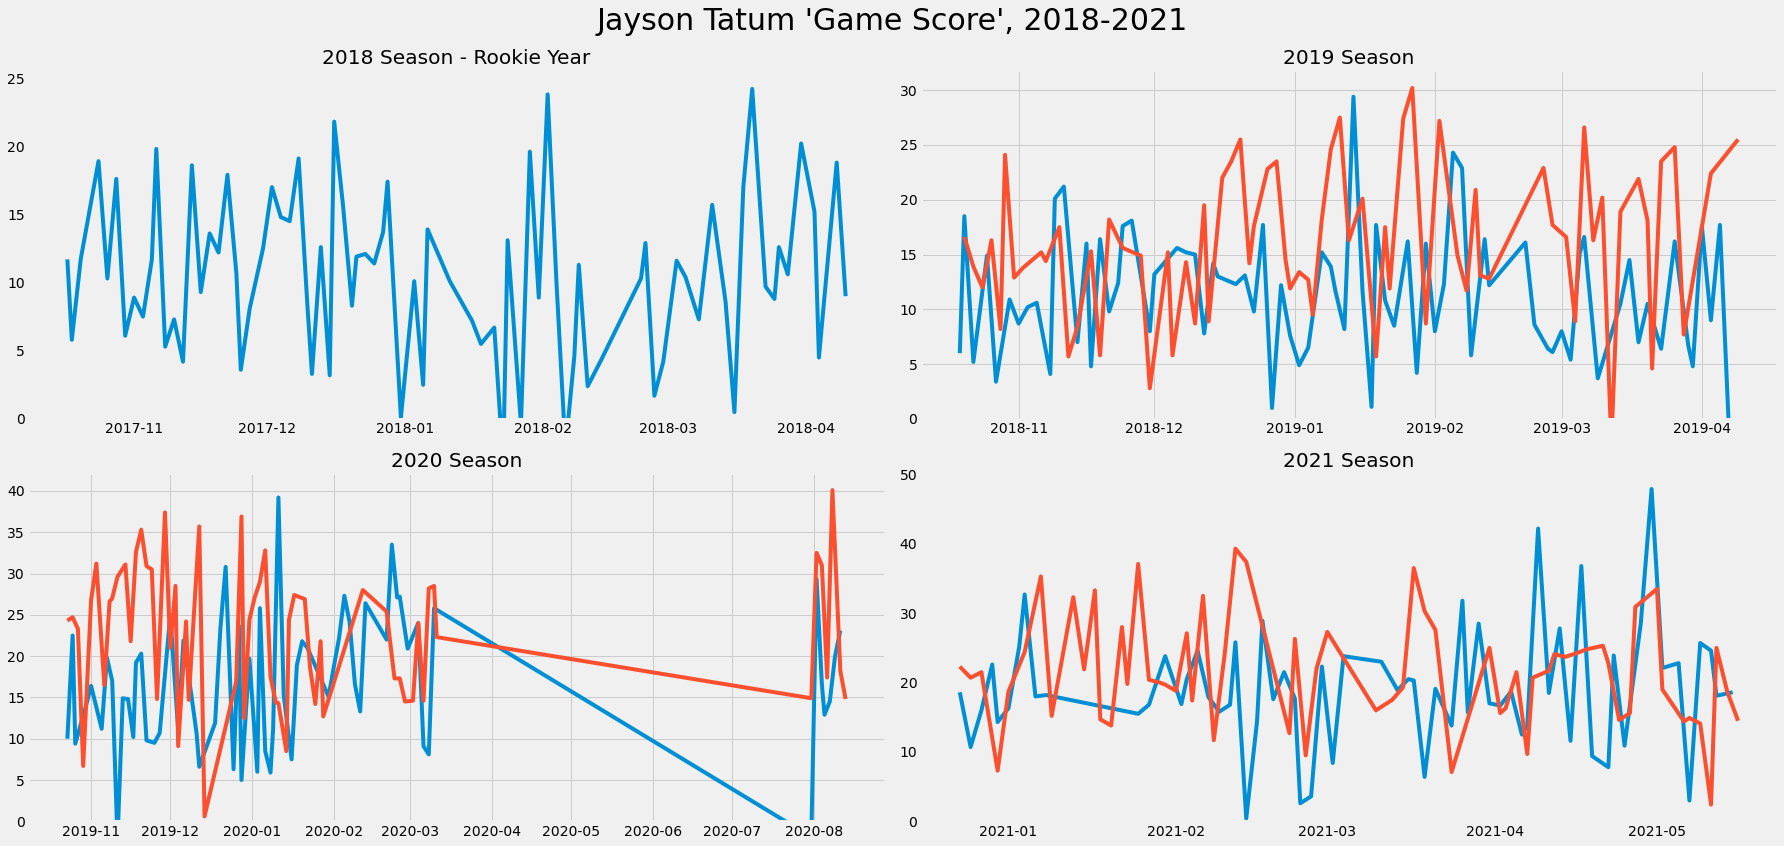

In [135]:
plt.style.use('fivethirtyeight')
f = plt.figure(figsize=(25,12))
ax = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)

f.suptitle("Jayson Tatum 'Game Score', 2018-2021", fontsize=30)

ax.plot(tatum_2018['DATE'], tatum_2018['GAME_SCORE'])
ax2.plot(tatum_2019['DATE'], tatum_2019['GAME_SCORE'])
ax3.plot(tatum_2020['DATE'], tatum_2020['GAME_SCORE'])
ax4.plot(tatum_2021['DATE'], tatum_2021['GAME_SCORE'])

ax.plot(luka_2018['DATE'], luka_2018['GAME_SCORE'])
ax2.plot(luka_2019['DATE'], luka_2019['GAME_SCORE'])
ax3.plot(luka_2020['DATE'], luka_2020['GAME_SCORE'])
ax4.plot(luka_2021['DATE'], luka_2021['GAME_SCORE'])

ax.set_ylim(0)
ax2.set_ylim(0)
ax3.set_ylim(0)
ax4.set_ylim(0)

ax.grid(False)
ax4.grid(False)

ax.title.set_text('2018 Season - Rookie Year')
ax2.title.set_text('2019 Season')
ax3.title.set_text('2020 Season')
ax4.title.set_text('2021 Season')
plt.tight_layout()

### 2018 season best line using seaborn

In [ ]:

#tatum_2018_df['DATE_f'] = pd.factorize(tatum_2018_df['DATE'])[0] + 1
#mapping = dict(zip(tatum_2018_df['DATE_f'], tatum_2018_df['DATE'].dt.date))

#ax = sns.regplot('DATE_f', 'GAME_SCORE', data=tatum_2018_df)
#labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
#ax.set_xticklabels(labels)

In [ ]:


#ax = sns.regplot(
    #data=tatum_2018,
    #x='DATE_ordinal',
    #y='GAME_SCORE')

# figure size in inches
#rcParams['figure.figsize'] = 11.7,8.27

# Tighten up the axes for prettiness
#ax.set_xlim(tatum_2018['DATE_ordinal'].min() - 1, tatum_2018['DATE_ordinal'].max() + 1)
#ax.set_ylim(0, tatum_2018['GAME_SCORE'].max() + 1)

# convert to date
#ax.set_xlabel('DATE')
#new_labels = [dt.date.fromordinal(int(item)) for item in ax.get_xticks()]
#ax.set_xticklabels(new_labels)

## Team Functions

In [ ]:
from basketball_reference_scraper.teams import get_roster, get_team_stats, get_opp_stats, get_roster_stats,get_team_misc
df_bos_2021 = get_roster('BOS', 2021)
df_bos_2021.head()

In [ ]:
df_bos_2021_players = df_bos_2021['PLAYER'].to_list()
df_bos_2021_players